## Autokorrelation Signal 

### Tag 1

> Mein Steckbrief über das wunderschöne Land Frankreich ist noch lange nicth zu ende, es gibt noch so viel mehr über dieses Land und meinem Trip zu berichten.

> Was darf bei einer langen Reise durch Frankreich auf keinen Fall fehlen? Richtig: Snacks und natürlich Musik. Musik begleitet mich fast überall hin. Ich liebe es, unterschiedliche Genres zu hören, von klassischen Stücken bis hin zu Techno. Doch eine Sache fällt mir dabei schwer: Ich habe ein sehr schlechtes Gehör für Details in Tönen und Melodien.

> Ein gutes Beispiel ist eines meiner liebsten klassischen Stücke: "Für Elise" von Beethoven. Dieses Stück hat mich auch auf meinem Trip durch Frankreich begleitet. Als uns während der langen Autofahrten die Gesprächsthemen ausgingen, diskutierte ich mit meinem Freund über die Musik. Er erklärte mir, dass die Grundmelodie von "Für Elise" sich ständig in verschiedenen Variationen wiederholt und gerade dadurch beim Zuhörer starke Emotionen hervorruft – von Nostalgie bis hin zu Spannung. Ich konnte es ehrlich gesagt nicht ganz nachvollziehen, denn für mich klang die Melodie immer gleich.

> Doch genau diese Diskussion brachte mich auf eine spannende Idee: Warum nicht Melodien systematisch auf wiederkehrende Muster untersuchen und vergleichen, welche Elemente tatsächlich die meisten Emotionen auslösen? Sind es die wiederholenden Muster, die unser Gehör unbewusst ansprechen, oder vielleicht doch etwas ganz anderes?

> Ich werde mich am Anfang erstmal auf das Lied Für Elise fokussieren und die Meldie gebauer analysieren.


(Der Text wurde mit Perplexity überarbeitet)

In [1]:
# Signal laden
import pygame
import time

mp3_file = "Elise.mp3"

pygame.init()
pygame.mixer.init()
pygame.mixer.music.load(mp3_file)

# Das Stück habe ich aus dem Internet heruntergeladen, damit es eine besser Qualitäöt hat, als die Aufnahme auf meinem Handy.

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Tag 2 und 3

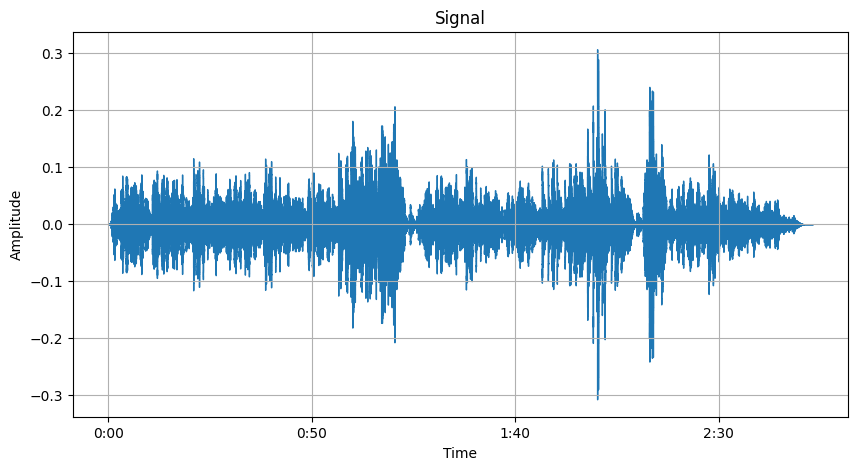

In [2]:
# Frequenz
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Samplingrate
n, sr = librosa.load(mp3_file, sr=None)

# Frequenzspektrum
plt.figure(figsize=(10, 5))
plt.title("Signal")
plt.xlabel("Zeit [Minuten]")
plt.ylabel("Amplitude")
plt.grid(True)

librosa.display.waveshow(n, sr=sr)
plt.show()

In dem Plot sieht man, wie sich die Amplitude des Signals über die Zeit verhält. Es ist zu erkennen, dass die Amplitude des Signals sehr stark schwankt, es jedoch einige wiederkehrende Muster gibt.

Ich werde nun ein Ausschnitt aus dem Signal nehmen und dies mit dem Originalen Sound vergleichen, um zu schauenm ob sich dieser Auschnitt nochmals wiederholt.

In [3]:
# sampling rate in Sekunden
print("Samplingrate: ", sr)
# sample_index = time_in_seconds * sr

Samplingrate:  44100


Mit dieser Formel lässt sich von der sample rate auf die Sekunden in der Audiodatei schließen. Dies hilft mir die richtigen Sequenzen des Liedes zu extrahieren.

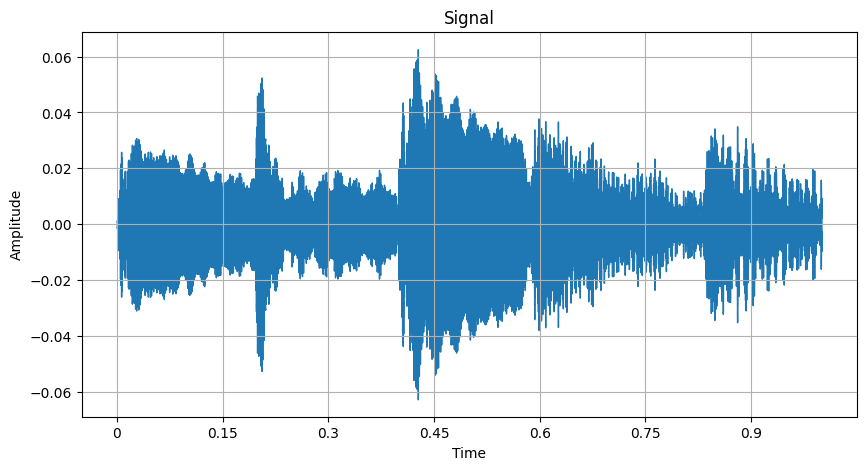

In [4]:
# Sample-Bereiche direkt angeben
n_part = n[48500:48500+44100] # 44100 samples = 1 Sekunde, insgesamt 10 Ssekunden

plt.figure(figsize=(10, 5))
plt.title("Signal")
plt.xlabel("Zeit [Minuten]")
plt.ylabel("Amplitude")
plt.grid(True)

librosa.display.waveshow(n_part, sr=sr)
plt.show()

In [5]:
# Metriken berechnen
mean_ = np.mean(n_part)
std_ = np.std(n_part)

print("Mean: ", mean_)
print("Std: ", std_)
print("Min: ", np.min(n_part))
print("Max: ", np.max(n_part))

Mean:  -7.839478e-05
Std:  0.013956431
Min:  -0.050972156
Max:  0.06265153


Maximale Korrelation: 1.0000000134821818
Maximale Korrelation bei Index: 48500


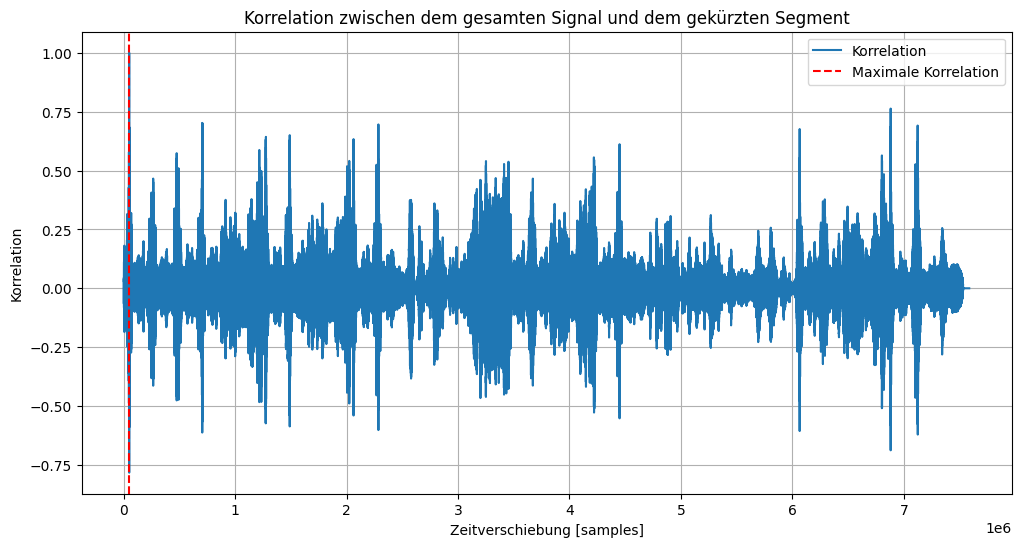

In [6]:
# Autokoorelation
# Pearson-Korrelation

def crosscorr(signal, segment):
    """
    Berechnet die Kreuzkorrelation zwischen einem Signal und einem kürzeren Segment.
    Normalisiert die Kreuzkorrelation so, dass der Maximalwert 1 erreicht wird, wenn das Segment exakt enthalten ist.
    """
    # Länge des Segments
    len_segment = len(segment)

    # Kreuzkorrelation berechnen
    correlation = np.correlate(signal, segment, mode='valid')

    # Normierungsfaktor berechnen (Summe der Quadrate)
    segment_energy = np.sum(segment**2)
    norm_factor = np.sqrt(segment_energy * np.convolve(signal**2, np.ones(len_segment), mode='valid'))

    # Vermeidung von Division durch 0
    epsilon = 1e-10  # Kleine Konstante
    normalized_correlation = correlation / (norm_factor + epsilon)

    return normalized_correlation

# Kreuzkorrelation berechnen
cross_corr_values = crosscorr(n, n_part)

# Index der maximalen Korrelation finden
max_index = np.argmax(cross_corr_values)
print(f"Maximale Korrelation: {cross_corr_values[max_index]}")
print(f"Maximale Korrelation bei Index: {max_index}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(cross_corr_values, label="Korrelation")
plt.axvline(x=max_index, color='red', linestyle='--', label="Maximale Korrelation")
plt.title("Korrelation zwischen dem gesamten Signal und dem gekürzten Segment")
plt.xlabel("Zeitverschiebung [samples]")
plt.ylabel("Korrelation")
plt.legend()
plt.grid(True)
plt.show()

In der Pearson-Korrelation erkennt man auf der X-Achse die Zeit und auf der Y-Achse die Korrelation. Ich habe mir also die gekürzte Sequenz des Liedes genommen und diese mit dem Originalen Lied verglichen, um zu schauen, wie oft diese im Lied vorkommen könnte.
Der rote Strich ist die Seuqenz, die ich aus dem Signal extrahiert habe, weshalb wir dort auch eine Korrelation von 1 sehen. Man erkennt jedoch einige andere Frequenzen, die eine relativ hohe Korrelation aufweisen. Dies könnte darauf hindeuten, dass es sich um ein wiederkehrendes Muster handelt.

Gefilterte Peaks mit Mindestabstand von 5 Sekunden:
Peak 1: Index = 48500, Korrelation = 1.000000, Zeit = 1.10 Sekunden
Peak 2: Index = 6882443, Korrelation = 0.762819, Zeit = 156.06 Sekunden
Peak 3: Index = 705204, Korrelation = 0.701957, Zeit = 15.99 Sekunden
Peak 4: Index = 2285088, Korrelation = 0.695580, Zeit = 51.82 Sekunden
Peak 5: Index = 7124519, Korrelation = 0.690837, Zeit = 161.55 Sekunden


c:\Users\Michelle\Desktop\Uni\Code\bild-und-signalverarbeitung\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


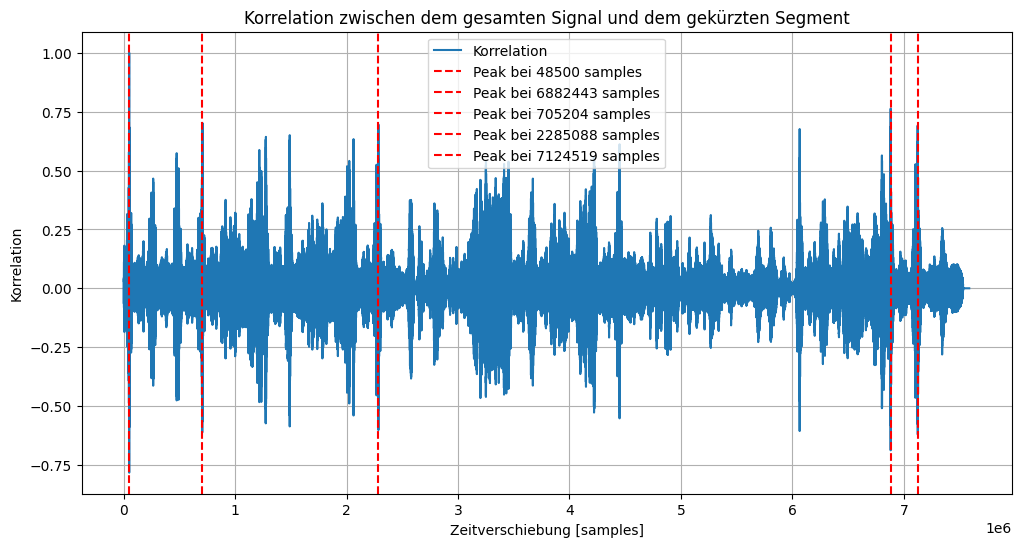

In [7]:
# Top 5 Peaks mit Mindestabstand von 5 Sekunden finden
# Abstand in Samples (5 Sekunden bei sr = 44100)
min_distance = 5 * sr

# Top-Indices sortieren nach Korrelation
sorted_indices = np.argsort(cross_corr_values)[::-1]

# Liste zur Speicherung der gefilterten Peaks
filtered_peaks = []

for index in sorted_indices:
    # Prüfen, ob dieser Peak weit genug von den anderen Peaks entfernt ist
    if all(abs(index - peak) > min_distance for peak in filtered_peaks):
        filtered_peaks.append(index)

    # Beenden, wenn wir 5 Peaks gefunden haben
    if len(filtered_peaks) == 5:
        break

# Gefilterte Peaks ausgeben
print("Gefilterte Peaks mit Mindestabstand von 5 Sekunden:")
for i, peak in enumerate(filtered_peaks, start=1):
    time_in_seconds = peak / sr
    print(f"Peak {i}: Index = {peak}, Korrelation = {cross_corr_values[peak]:.6f}, Zeit = {time_in_seconds:.2f} Sekunden")

# Plot der Korrelation mit markierten Peaks
plt.figure(figsize=(12, 6))
plt.plot(cross_corr_values, label="Korrelation")
for peak in filtered_peaks:
    plt.axvline(x=peak, color='red', linestyle='--', label=f"Peak bei {peak} samples")
plt.title("Korrelation zwischen dem gesamten Signal und dem gekürzten Segment")
plt.xlabel("Zeitverschiebung [samples]")
plt.ylabel("Korrelation")
plt.legend()
plt.grid(True)
plt.show()


Ich habe nun die besten 5 Korrelationen extrahiert, ich habe einen mindestabstand von 5 Sekunden zwischen diesen Peaks gewählt, um zu verhindern, dass ich die gleiche Sequenz mehrmals extrahiere. Auf den ersten Blick sieht das schon sehr vielversprechen aus, ich werde die Seuqenzen im nächsten Schritt anhören.

In [8]:
# Gefilterte Peaks abspielen
from IPython.display import Audio, display

seconds_before_peak = 5
seconds_after_peak = 10

for i, peak in enumerate(filtered_peaks):
    # Sample-Bereiche berechnen
    start_sample = max(0, peak - seconds_before_peak * sr)
    end_sample = min(len(n), peak + seconds_after_peak * sr)

    # Signalbereich extrahieren
    extracted_signal = n[start_sample:end_sample]

    print(f"Wiedergabe von Segment {i+1}:")
    display(Audio(extracted_signal, rate=sr))

Wiedergabe von Segment 1:


Wiedergabe von Segment 2:


Wiedergabe von Segment 3:


Wiedergabe von Segment 4:


Wiedergabe von Segment 5:


Die Abschnitte hören sich sehr ähnlich an, was darauf hindeutet, dass die Pearson-korrelation sehr gut funktioniert hat.

### Tag 4



Ich habe mit der Autokorrelation gearbeitet, um wiederkehrende Muster in dem Signal zu finden. Ich habe die besten 5 Korrelationen extrahiert. Die ersten 15 Sekunden kehren immer wieder im Lied auf, was man auch direkt im Lied und in der Frequenzanalyse erkennen kann. Jedoch möchte ich herausfinden, ob auch die Autokorrelation diese Muster erkennt, denn es ist leider sehr mühsam die Frequenzen per Hand auszulesen.

Ich habe also 10 Sekunden am Anfang vom Lied extrahiert und mithilfe der Pearson-korrelation zu schauen, in welchen Bereichen die Sequenzen sich ähnlich sind. Dabei habe ich die 5 besten Werte rausgesucht, der erste Wert mit einer Korrelation von 1 ist die Sequenz, die ich aus dem Lied extrahiert habe. Die anderen Werte sind die Sequenzen, die sich am meisten ähneln, jedoch habe ich darauf geachtet, dass die Sequenzen mindestens 5 Sekunden auseinander liegen, um zu verhindern, dass ich die gleiche Sequenz mehrmals extrahiere. Ich habe ausserdem die samplke rate in Sekunden umgerechnet, um diese Seuqnzen im Lied zu finden und zu vergleichen.

Die Audioabschnitte klingen sehr ähnlich, wobei ich immer noch die 5 Sekunden vor dem Peak miteingebaut habe, sollte die Sequenz nicht exkakt passen. Man hört sehr gut heraus, dass es sich um die gleiche Sequenz handelt, da die Korrelation jedoch bei den anderen nicht bei 1 liegt, kann man darauf schliessen, dass es keine identischen Wiederholungen sind, sondern sehr ähnliche.

Man kann also sagen, dass das Lied "Für Elise" von Beethoven wiederkehrende Muster enthält, die sich sehr ähnlich sind, jedoch nicht identisch. Es sind exakt 5 Wiederholungen, wobei die ersten zwei und die letzten zwei sich an einem Stück wiederholen, während in der Mitte die Sequenz nur einmal wiederholt wird. Mein Freund war also richtig mit seiner Annahme, dass die Melodie sich ständig in verschiedenen Variationen wiederholt und gerade dadurch beim Zuhörer starke Emotionen hervorruft – von Nostalgie bis hin zu Spannung.